# Explanatory Visualizations
---

## Overview
In this lesson, we will learn about explanatory analysis which is about conveying and communicating the findings. You will learn:

- Steps to tell a story using data
- Tools and techniques to polish plots
- Presenting findings using a slide deck
- Getting and using feedback

The previous three lessons in the course have been focused on expl**o**ratory analyses. In phases with exploratory visualizations, the primary audience for the visuals will be you, the analyst. The plots that have been created and demonstrated haven't been particularly polished, just descriptive enough for you to gain insights into the data.

This lesson is focused on taking those insights and creating expl**an**atory analyses. Here, your audience will be broader: your goal will be to convey your findings to other people who don't have the level of hands-on experience with the data as you. Visualizations under this banner should be focused on telling a specific story that you want to convey to that particular audience. Many times, these visualizations evolve from visuals created during the exploratory process, just polished up to highlight the specific intended insights. These highlights might change depending on the audience you're presenting to. You'll revisit those design concepts from earlier in the course to make your plots informative not just for yourself, but also compelling and understandable for others.

## Tell a Story
Telling stories with data follows these steps:

- Start with a Question
- Repetition is a Good Thing
- Highlight the Answer
- Call Your Audience To Action

### Data Storytelling Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('support-files/06_Explanatory-Vis/data-storytelling-practice.csv', sep=';')
df.head()

,Feeling,Percent,Feeling.1,Percent.1
0,Bored,11,Bored,12
1,Not Great,5,Not Great,6
2,OK,40,OK,14
3,Kind of Interested,25,Kind of Interested,30
4,Excited,19,Excited,38


In [3]:
# copy the orginal dataframe before 
# making changes to it
df2 = df.copy()
df2 = df.rename(columns={'Percent': 'Before', 'Percent.1': 'After'})
df2.head(10)

,Feeling,Before,Feeling.1,After
0,Bored,11,Bored,12
1,Not Great,5,Not Great,6
2,OK,40,OK,14
3,Kind of Interested,25,Kind of Interested,30
4,Excited,19,Excited,38


In [4]:
# use pd.melt to transform the dataframe
# in a way that's easier to work with
df2 = pd.melt(df2, id_vars=['Feeling'], value_vars=['Before', 'After'], value_name='Percent', var_name='id')
df2.head(10)

,Feeling,id,Percent
0,Bored,Before,11
1,Not Great,Before,5
2,OK,Before,40
3,Kind of Interested,Before,25
4,Excited,Before,19
5,Bored,After,12
6,Not Great,After,6
7,OK,After,14
8,Kind of Interested,After,30
9,Excited,After,38


In [5]:
# change the Feeling classes to Categorical dtype
# this way, in visualizations, it'll always be ordered
# by the categories
feeling_classes = ['Bored', 'Not Great', 'OK', 'Kind of Interested', 'Excited']
feeling_classes = pd.api.types.CategoricalDtype(ordered=True, categories=feeling_classes)
df2['Feeling'] = df2['Feeling'].astype(feeling_classes)

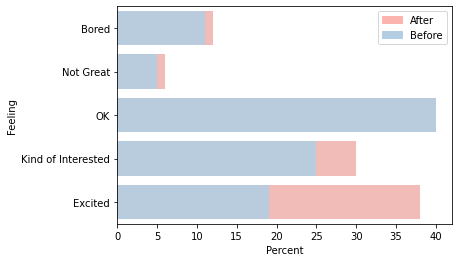

In [6]:
# first attempt at making a bar chart, a stacked horizontal bar chart
# here, the y axis shows each feeling category
# we can see that after the class, students are more
# positive towards science
# but the chart still could use a few tweks, like 
# including the percentages in each bar
bar1 = sns.barplot(data=df, y='Feeling.1', x='Percent.1', color=sns.color_palette('Pastel1')[0])
bar2 = sns.barplot(data=df, y='Feeling', x='Percent', color=sns.color_palette('Pastel1')[1])

top_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[0], label='After')
bottom_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[1], label='Before')
plt.legend(handles=[top_bar, bottom_bar]);

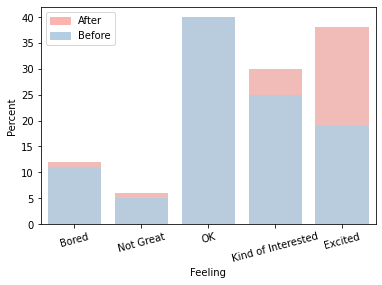

In [7]:
# plotting a chart with the same data, but
# with a regular stacked bar chart
bar1 = sns.barplot(data=df, x='Feeling.1', y='Percent.1', color=sns.color_palette('Pastel1')[0])
bar2 = sns.barplot(data=df, x='Feeling', y='Percent', color=sns.color_palette('Pastel1')[1])

top_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[0], label='After')
bottom_bar = mpatches.Patch(color=sns.color_palette('Pastel1')[1], label='Before')
plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=15);

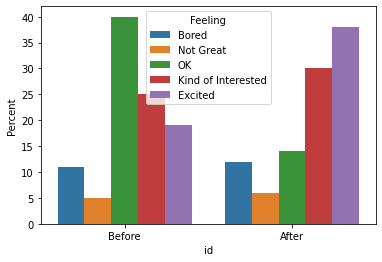

In [8]:
# trying different things
# didn't like this one, though
bar3 = sns.barplot(data=df2, x='id', y='Percent', hue='Feeling')

> Note: [Discussion](https://stackoverflow.com/questions/34917727/stacked-bar-plot-by-grouped-data-with-pandas) on StackOverflow that helped me create the chart like the one below.

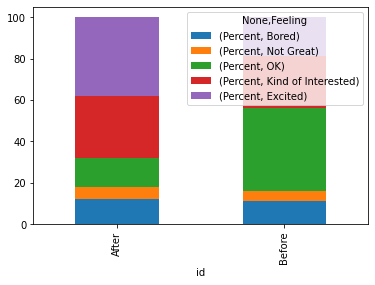

In [9]:
# instead of using the Feeling classes, 
# I tried using just two bars: Before and After
# This chart needs a lot of adjustments before
# being good enough to show in a presentation, however
df2.groupby(['id', 'Feeling']).sum().unstack().plot(kind='bar', stacked=True);

> Note: [format](https://stackoverflow.com/questions/31357611/format-y-axis-as-percent) y axis as percent.

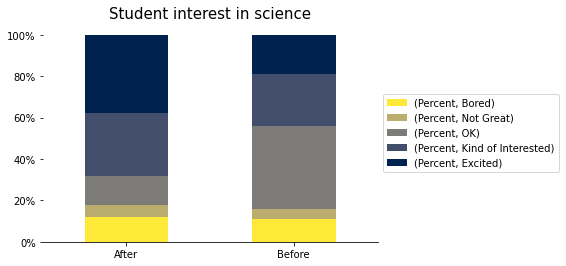

In [10]:
# in this version, I used a sequential color map
# I could've used a diverging one too, especially considering
# this uses a Likert scale, but then I'd need a background color too,
# since the middle category would turn white
total = df2.groupby(['id', 'Feeling']).sum().unstack()

ax = total.plot(kind='bar', stacked=True, cmap='cividis_r')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.spines[['left', 'top', 'right']].set_visible(False)
plt.xticks(rotation=0)
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.xlabel('')
plt.ylabel('')
plt.title('Student interest in science', fontsize=15);

> Note: `df.reindex()` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html)

In [11]:
# use df.reindex() to force Before as the first bar
new_index = ['Before', 'After']
total = total.reindex(new_index)
total

Percent                                         
Feeling   Bored Not Great  OK Kind of Interested Excited
id                                                      
Before       11         5  40                 25      19
After        12         6  14                 30      38

> Note1: stacked bar chart [with value](https://pythonguides.com/stacked-bar-chart-matplotlib/)

> Note2: annotation [examples](https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples)

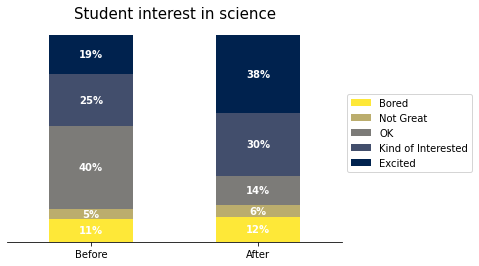

In [12]:
# in this version, I managed to add the annotation with 
# the percentage for each section of the bars,
# I also improved the legend

ax = total.plot(kind='bar', stacked=True, cmap='cividis_r')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # reduntant now that I removed the yaxis
ax.spines[['left', 'top', 'right']].set_visible(False)
ax.get_yaxis().set_visible(False)
plt.xticks(rotation=0)
plt.legend(['Bored', 'Not Great', 'OK', 'Kind of Interested', 'Excited'], loc=6, bbox_to_anchor=(1.0, 0.5))
plt.xlabel('')
plt.ylabel('')
plt.title('Student interest in science', fontsize=15)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, "{:.0f}%".format(label_text), ha='center',    
            va='center', color='white', fontweight='bold')